<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Recomendaci%C3%B3n_de_libros_usando_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y funciones

In [208]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [209]:
# Procesamiento y Visualizacion de Datos
import pandas as pd
import numpy as np
from collections import Counter # para contar frecuencias
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocesar texto
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
from wordcloud import WordCloud

# Modelado de tópicos
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [210]:
stopwords_nltk = stopwords.words('spanish')
print(stopwords_nltk, len(stopwords_nltk))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [211]:
stopwords = pd.read_csv('https://gist.githubusercontent.com/cr0wg4n/78554c5d0afa9944d2fa3a4435d83a57/raw/df59fb916108f2a58bf1a3d8c62818b44231586d/spanish-stop-words.txt', header=None)
stopwords_list = stopwords[0].tolist()
print(stopwords_list, len(stopwords_list))
stopwords_list.append('vos')
stopwords_list.append('cuál')

['a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', '

<h2>  Funciones

In [212]:
def nube_palabras(sec_textos):
    # Crear la cadena con la que haremos la nube de palabras
    text= " ".join(review for review in sec_textos)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(text)
    

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [213]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*') #stopwords.words('spanish')
  texto = stop.sub('', texto) 

  #Quitar puntuación y números
  texto = re.sub('[^ña-záéíóúü]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  # st = PorterStemmer()
  lemma = WordNetLemmatizer()
  texto = texto.split()
  texto = ' '.join([lemma.lemmatize(i) for i in texto if len(i)>2])
  
  return(texto)

# Lectura y exploración de datos

In [214]:
import glob

speech_list = glob.glob('C:\\Users\\conte\\OneDrive\\Escritorio\\Discursos\\MM\\*.txt')

df_af = pd.DataFrame(columns=['speech','date','speech_length'], index=[i for i in range(len(speech_list))])

for key, speech in enumerate(speech_list):
    with open(speech, 'r', encoding='utf-8') as file:
        df_af['speech'][key] = file.read()
    df_af['date'][key] = speech[51:53] + '/' + speech[54:56] + '/' + speech[57:61]
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSOS)','')
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSO)','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE MACRI.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('MACRI.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PERIODISTA.-','')
    df_af['speech_length'][key] = len(df_af['speech'][key].split())

In [215]:
# Dtypes assignment
df_af['speech'] = df_af['speech'].astype(str)
df_af['date'] = df_af['date'].astype('M')
df_af['speech_length'] = df_af['speech_length'].astype(int)

#Sorting by date
df_af = df_af.sort_values('date')

df_af

,speech,date,speech_length
622,Gracias a todos por acompañarnos y espero – co...,2015-12-10,29
623,Señores Jefes de Estado; representantes de del...,2015-12-10,2803
624,"Gracias, muchas gracias: es difícil transmitir...",2015-12-10,323
626,"Agradezco al señor intendente de Exaltación, a...",2015-12-11,207
636,"Buenas tardes a todos, es una enorme alegría q...",2015-12-14,2067
...,...,...,...
595,"Buenas tardes a todos, miembros de la Unión In...",2019-11-29,1118
612,"Gracias, Pedro. Es un honor ser parte de esta ...",2019-12-02,456
611,Buenas tardes a todos: estamos muy contentos d...,2019-12-02,198
617,"Bom dia, hasta ahí llegó el portugués.\n\nPero...",2019-12-05,1214


In [216]:
speechs = ' '.join(df_af['speech'][i]for i in range(len(df_af)))

print(f'Total words in speechs: {len(speechs.split())}')
words_speechs = Counter(speechs.split())
words_speechs.most_common(10)

Total words in speechs: 713679


[('que', 43635),
 ('de', 32005),
 ('la', 20501),
 ('y', 19750),
 ('a', 19740),
 ('en', 17356),
 ('el', 15323),
 ('los', 10471),
 ('es', 10065),
 ('para', 7841)]

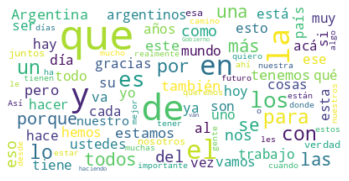

In [217]:
nube_palabras(df_af['speech'])

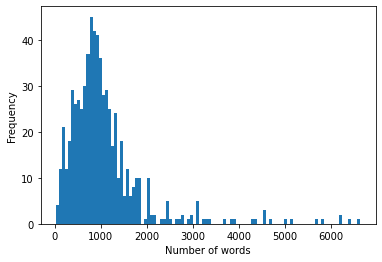

In [218]:
df_af['speech_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [219]:
df_af['speech_length'].describe()

count     663.000000
mean     1076.438914
std       867.706617
min        29.000000
25%       599.000000
50%       899.000000
75%      1263.000000
max      6645.000000
Name: speech_length, dtype: float64

# Obtener los tópicos principales

## Vectorización de textos

In [220]:
df_af['summary'] = df_af['speech'].apply(preprocesar)

df_af['summary_length'] = df_af['summary'].str.split().str.len()

df_af.head()

,speech,date,speech_length,summary,summary_length
622,Gracias a todos por acompañarnos y espero – co...,2015-12-10,29,gracias acompañarnos espero dije frente plaza ...,12
623,Señores Jefes de Estado; representantes de del...,2015-12-10,2803,señores jefes representantes delegaciones extr...,1070
624,"Gracias, muchas gracias: es difícil transmitir...",2015-12-10,323,gracias gracias difícil transmitirles siente a...,119
626,"Agradezco al señor intendente de Exaltación, a...",2015-12-11,207,agradezco señor intendente exaltación señores ...,75
636,"Buenas tardes a todos, es una enorme alegría q...",2015-12-14,2067,tardes enorme alegría salón lleno marca espera...,728


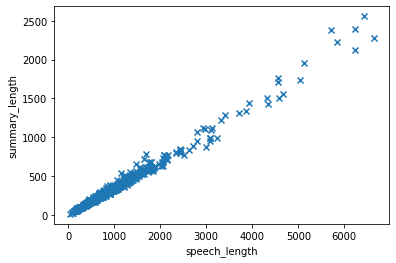

In [221]:
plt.scatter(df_af['speech_length'], df_af['summary_length'], marker='x')
plt.xlabel('speech_length')
plt.ylabel('summary_length')
plt.show()

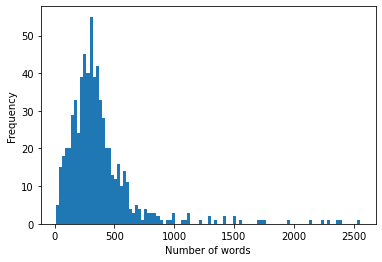

In [222]:
df_af['summary_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [223]:
df_af['summary_length'].describe()

count     663.000000
mean      376.980392
std       311.997838
min        12.000000
25%       217.000000
50%       313.000000
75%       434.500000
max      2557.000000
Name: summary_length, dtype: float64

In [224]:
summaries = ' '.join(df_af['summary'][i]for i in range(len(df_af)))

print(f'Total words in summaries: {len(summaries.split())}')
words_summaries = Counter(summaries.split())
words_summaries.most_common(10)

Total words in summaries: 249938


[('argentina', 2998),
 ('argentinos', 2538),
 ('país', 2405),
 ('años', 2277),
 ('mundo', 1931),
 ('acá', 1859),
 ('gracias', 1818),
 ('ustedes', 1775),
 ('día', 1325),
 ('junto', 1273)]

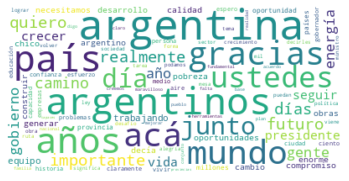

In [225]:
nube_palabras(df_af['summary'])

In [226]:
vectorizer = CountVectorizer(min_df = 10, max_df = 0.2, ngram_range=(1,3))
BOW = vectorizer.fit_transform(df_af['summary'])
BOW.shape

(663, 4238)

In [227]:
vocabulario = vectorizer.get_feature_names_out()
len(vocabulario)

4238

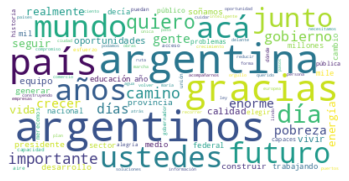

In [228]:
nube_palabras(vocabulario)

## Entrenamiento del modelo

El número óptimo de topicos depende de las caracteristicas del texto a analizar (el largo de los textos, la cantidad de distintas ideas)

No obstante existen algunas metricas que ayudan a determinar k.

In [229]:
k = 5

In [230]:
lda_model = LatentDirichletAllocation(n_components=k, learning_method='online', max_iter=1000, random_state=0) 

In [231]:
%%time
lda_model.fit(BOW) # entrena el modelo y obtienela matriz documento-topico

CPU times: total: 1min 36s
Wall time: 3min 24s


LatentDirichletAllocation(learning_method='online', max_iter=1000,
                          n_components=5, random_state=0)

### Distribución de temas en cada noticia  ($\theta$)

In [232]:
doc_top = pd.DataFrame(lda_model.transform(BOW))
print(doc_top.shape)
doc_top.head()

(663, 5)


,0,1,2,3,4
0,0.937855,0.015445,0.015501,0.015671,0.015528
1,0.063773,0.234541,0.445000,0.073930,0.182757
2,0.099277,0.088964,0.167302,0.585460,0.058997
3,0.005504,0.005583,0.005538,0.717114,0.266261
4,0.000520,0.064450,0.131114,0.000526,0.803390


In [233]:
doc_top.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
658    1.0
659    1.0
660    1.0
661    1.0
662    1.0
Length: 663, dtype: float64

In [234]:
df_lda = pd.merge(df_af, doc_top, left_index=True, right_index=True)
df_lda.head()

,speech,date,speech_length,summary,summary_length,0,1,2,3,4
622,Gracias a todos por acompañarnos y espero – co...,2015-12-10,29,gracias acompañarnos espero dije frente plaza ...,12,0.006589,0.006623,0.006575,0.782593,0.197620
623,Señores Jefes de Estado; representantes de del...,2015-12-10,2803,señores jefes representantes delegaciones extr...,1070,0.000819,0.000818,0.190501,0.000816,0.807046
624,"Gracias, muchas gracias: es difícil transmitir...",2015-12-10,323,gracias gracias difícil transmitirles siente a...,119,0.001971,0.317641,0.001939,0.487106,0.191343
626,"Agradezco al señor intendente de Exaltación, a...",2015-12-11,207,agradezco señor intendente exaltación señores ...,75,0.076755,0.610517,0.000862,0.116154,0.195712
636,"Buenas tardes a todos, es una enorme alegría q...",2015-12-14,2067,tardes enorme alegría salón lleno marca espera...,728,0.000548,0.282908,0.143175,0.244932,0.328437


### Distribución de palabras en cada tema ($\mu$)

In [235]:
μs = pd.DataFrame(lda_model.exp_dirichlet_component_,
                         columns=vocabulario)
print(μs.shape)
μs

(5, 4238)


,abajo,abandonado,abandonar,abandono,abastecer,abierta,abierto,abiertos,abrazo,abre,...,ética,éxito,éxitos,íbamos,única,única comercio,única comercio exterior,único camino,único equipo,únicos
0,8.417029e-07,7.620910e-07,8.185841e-07,5.746284e-04,7.650679e-07,9.880806e-07,7.875004e-07,7.969170e-07,9.733878e-07,9.777421e-07,...,8.608855e-07,8.070224e-07,3.442079e-04,8.159884e-07,8.019283e-07,7.562756e-07,7.562756e-07,7.923470e-07,7.580139e-07,7.610196e-07
1,1.706837e-07,2.696167e-04,1.739458e-07,4.308840e-04,1.632629e-07,1.189936e-04,1.155519e-03,2.505260e-04,3.341128e-04,2.509375e-06,...,2.127202e-04,1.327184e-03,1.818966e-07,1.740298e-05,1.968241e-03,2.399748e-04,2.399748e-04,8.110316e-06,1.669381e-07,3.462669e-04
2,1.087486e-04,1.747890e-07,2.611665e-04,1.768012e-07,2.234552e-05,2.367262e-04,6.950295e-04,1.059238e-04,1.980031e-07,1.957941e-04,...,1.356862e-04,1.547375e-03,3.458248e-04,1.886965e-07,7.600840e-04,1.776339e-07,1.776339e-07,6.026759e-04,1.763630e-07,1.588156e-04
3,1.990860e-07,8.068062e-05,3.075848e-04,1.548756e-03,1.858998e-07,1.895480e-07,1.907243e-07,2.207788e-07,2.594544e-07,2.823672e-04,...,2.163164e-07,2.014094e-07,1.913170e-07,2.449895e-04,1.954191e-04,1.871058e-07,1.871058e-07,2.010956e-07,2.903852e-05,2.129241e-07
4,1.960997e-04,2.997904e-04,3.294729e-04,2.261492e-04,4.876771e-04,1.145255e-07,8.426345e-04,6.702194e-05,1.861032e-05,6.027537e-04,...,1.059351e-07,9.186158e-04,1.058400e-07,1.090088e-03,1.207117e-03,2.988075e-04,2.988075e-04,1.659803e-04,1.768920e-04,1.021954e-07



Palabras más frecuentes del topico 0
['fuerzas', 'armada', 'mujeres', 'fuerzas armada', 'paz', 'libertad', 'defensa', 'viva', 'servicio', 'patria', 'hombre', 'familiares', 'militar', 'narcotráfico', 'policía']


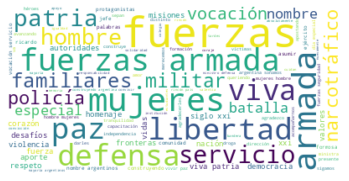


Palabras más frecuentes del topico 1
['pública', 'información', 'docentes', 'llegamos', 'resultados', 'pudimos', 'horacio', 'justicia', 'internet', 'corrupción', 'dejamos', 'aprender', 'valores', 'kilómetros', 'escuelas']


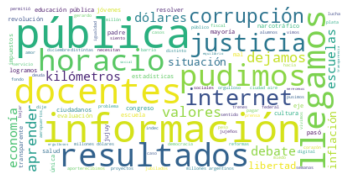


Palabras más frecuentes del topico 2
['mercosur', 'integración', 'región', 'visita', 'internacional', 'agenda', 'relación', 'desafíos', 'señor', 'temas', 'comercio', 'cooperación', 'macri', 'derechos', 'democracia']


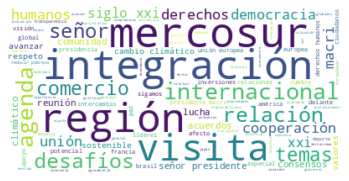


Palabras más frecuentes del topico 3
['maría', 'eugenia', 'maría eugenia', 'agua', 'intendente', 'feliz', 'gobernadora', 'turismo', 'norte', 'elegir', 'amor', 'san', 'esperanza', 'transporte', 'vecinos']


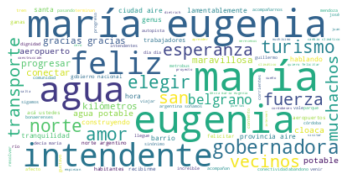


Palabras más frecuentes del topico 4
['campo', 'pymes', 'industria', 'exportar', 'trabajadores', 'producir', 'inflación', 'crear', 'vaca', 'vaca muerta', 'muerta', 'dije', 'empresa', 'impuestos', 'pasando']


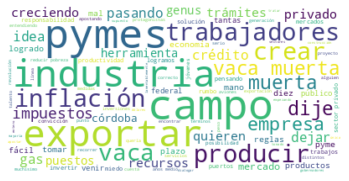

In [242]:
for top in range(k):
  print(f'\nPalabras más frecuentes del topico {top}')
  words = list(μs.T[top].sort_values(ascending=False).head(15).index)
  freq = μs.T[top].sort_values(ascending=False).head(100)
  print(words)
  wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate_from_frequencies(freq)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

### Visualización del modelo

In [237]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, BOW, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.049702  0.049818       1        1  40.270559
3      0.232660 -0.105892       2        1  19.748385
2     -0.049897  0.089532       3        1  19.642771
1     -0.052212  0.160865       4        1  17.069084
0     -0.180253 -0.194323       5        1   3.269201, topic_info=           Term        Freq       Total Category  logprob  loglift
1799    fuerzas  141.000000  141.000000  Default  30.0000  30.0000
2362   libertad  208.000000  208.000000  Default  29.0000  29.0000
2517      maría  243.000000  243.000000  Default  28.0000  28.0000
2948        paz  159.000000  159.000000  Default  27.0000  27.0000
3711   servicio  180.000000  180.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
4215        xxi   21.124777  153.094734   Topic5  -5.4403   1.4400
3734  siglo xxi   21.124771  153.094509   Topic5  -5.4403   1.4400
1798     fuerza   20.616586  186.976310   Topic5  -5.4647   1.2157
2742     nación   19.858764  152.496905   Topic5  -5.5021   1.3821
4057    valores   19.683774  194.471619   Topic5  -5.5110   1.1301

[358 rows x 6 columns], token_table=      Topic      Freq                        Term
term                                             
19        1  0.975120                      abuela
30        3  0.054348          acceso información
30        4  0.951085          acceso información
31        4  0.972820  acceso información pública
53        2  0.951732        acompañarnos gracias
...     ...       ...                         ...
4197      3  0.946649                         voz
4215      1  0.137170                         xxi
4215      3  0.522552                         xxi
4215      4  0.202489                         xxi
4215      5  0.137170                         xxi

[703 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

### Guardamos modelo

In [238]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# tuple_models = (lda_model, BOW, vectorizer)
# pickle.dump(tuple_models, open (path + "tuple_model_books_k10.pkl", 'wb'))

In [239]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# lda_model, BOW, vectorizer = pickle.load(open(path + "tuple_model_books_k10.pkl", 'rb'))


## Sistema de recomendación usando similitud coseno

In [240]:
# def similitud_coseno(a_vector, b_vector):
#     '''Calcula la similitud coseno entre los vectores a y b'''

#     numerador = np.dot(a_vector, b_vector)
    
#     a_norm = np.sqrt(np.sum(a_vector**2))  
#     b_norm = np.sqrt(np.sum(b_vector**2))
    
#     denominador = a_norm * b_norm
    
#     similitud_coseno = numerador / denominador 
    
#     return similitud_coseno

In [241]:
# def documentos_similares(titulo):
#   inx = df_af[titulo in df_af['Title']].index[0]
#   q_k = doc_top.loc[inx].values
#   n = doc_top.shape[0]
#   similaridad = {}
#   relevantes={}
  
#   # Calcular similitud coseno
#   for doc_inx in range(n):
#       if doc_inx == inx:
#           continue
#       similaridad[doc_inx] = similitud_coseno(q_k, doc_top.loc[doc_inx].values)

#   rank = {k:v for k,v in sorted(similaridad.items(), key=lambda x: x[1], 
#                                 reverse=True)}
#   top10 = pd.DataFrame.from_dict(rank, orient = 'index', columns=['sim_cos']).head()
#   recomendaciones = pd.merge(df.iloc[:,0:3], top10, how='right',  right_index=True, left_index=True)        
#   recomendaciones.index = np.arange(1, 6)
  return recomendaciones

IndentationError: unexpected indent (1234969060.py, line 19)